### import libraries

In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### get data

In [76]:
csv_path = 'C:\\Users\\jlfen\\OneDrive\\Documentos\\JoaoKasten\\005_applied_projects\\project.censo-dataviz\\src\\data\\census_data.csv'
df = pd.read_csv(csv_path)

## 1. Análise de Crescimento Demográfico Brasileiro 🌎

> ### _Abstract_
> Nesse estudo calculo a taxa de crescimento demográfico do Brasil e por Estado, além de identificar as cidades e estados com os maiores crescimentos, além da exibição gráfica dos valores calculados.

* Calcule a taxa de crescimento anual para o Brasil inteiro e para cada estado.
* Identifique as cidades com maior e menor crescimento em cada período censitário.
* Visualize o crescimento populacional em um gráfico de linhas ou barras.

In [77]:
pop_1991 = df[df['year'] == 1991]['population'].sum()
pop_2000 = df[df['year'] == 2000]['population'].sum()
pop_2010 = df[df['year'] == 2010]['population'].sum()
pop_2022 = df[df['year'] == 2022]['population'].sum()

### Taxa de Crescimento Demográfico Anual (_∆D_)

A fórmula geral para calcular a _∆D_ é:

\begin{equation}
∆D = \left( \frac{P_{\text{final}}}{P_{\text{inicial}}} \right)^{\frac{1}{n}} - 1
\end{equation}

Onde:
- _P_ final: população no final do período
- _P_ inicial: população no início do período
- _n_: número de anos entre o início e o final do período

### Taxa de Crescimento Demográfico Nacional (_∆DN_)

A taxa de crescimento demografico do Censo 2022 confirma a hipótese de que o Brasil está crescendo cada vez menos, com um média de 0,51% a.a. nos ultimos 30 anos.

In [78]:
def tca(p_initial, p_final, n):
    return (p_final/p_initial)**(1/n) - 1

# Calculando a TCA para os diferentes períodos
tca_1991_2000 = tca(pop_1991, pop_2000, 2000-1991)
tca_2000_2010 = tca(pop_2000, pop_2010, 2010-2000)
tca_2010_2022 = tca(pop_2010, pop_2022, 2022-2010)

# Calculando a TCA para o período completo
tca_1991_2022 = tca(pop_1991, pop_2022, 2022-1991)

# Mostrando as equações
print(f"TCA (1991-2000) = {tca_1991_2000*100:.2f}% ao ano")
print(f"TCA (2000-2010) = {tca_2000_2010*100:.2f}% ao ano")
print(f"TCA (2010-2022) = {tca_2010_2022*100:.2f}% ao ano")

# Calculando a TCA para o período completo
print('Entre 1991 e 2022:')
print(f"TCA (1991-2022) = {tca_1991_2022*100:.2f}% ao ano")

TCA (1991-2000) = 1.64% ao ano
TCA (2000-2010) = 1.17% ao ano
TCA (2010-2022) = 0.51% ao ano
Entre 1991 e 2022:
TCA (1991-2022) = 1.05% ao ano


### Criar tabela com os dados calculados

Para criar a tabela da requisição para o SIDRA:
1. Atribuímos a _data_ como um dicionário, e então usamos a biblioteca _pandas_ para transformar _data_ em uma _DataFrame_ para inciarmos as análises.

In [79]:
data = {
    'year': [1991, 2000, 2010, 2022],
    'population': [pop_1991, pop_2000, pop_2010, pop_2022],
    'tca': [np.nan, tca_1991_2000, tca_2000_2010, tca_2010_2022]
}

brazil_population_df = pd.DataFrame(data)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
brazil_population_df['population'] = brazil_population_df['population'].astype(int)
print(brazil_population_df)

   year  population     tca
0  1991   146186030     NaN
1  2000   169252872 0.01641
2  2010   190073788 0.01167
3  2022   202066275 0.00511


### O que dizem os dados?

* TCA (1991-2000) = 1.64% a.a.
* TCA (2000-2010) = 1.17% a.a.
* TCA (2010-2022) = 0.51% a.a.
* TCA (1991-2022) = 1.05% a.a.

A análise da Taxa de Crescimento Populacional ao longo dos anos revela uma clara tendência de desaceleração no Brasil. No período entre os censos de 1991 e 2000, a taxa estava em 1.64% ao ano. No entanto, ela caiu para 1.17% ao ano entre 2000 e 2010, e mais drasticamente para 0.51% ao ano entre 2010 e 2022. Esta última taxa é até mesmo menor do que a média geral do período entre 1991 e 2022, que é de 1.05% ao ano.

**Essa tendência sugere um envelhecimento da população brasileira. Não é um fenômeno isolado; muitos países ao redor do mundo estão experienciando uma desaceleração similar em seu crescimento populacional [1].**

Causas possíveis?

Com a melhora da infraestrutura, já havia inciado uma redução de filhos por mães, 



### Population Growth Since 1991

C:\Users\jlfen\AppData\Local\Temp\ipykernel_2568\2831352401.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


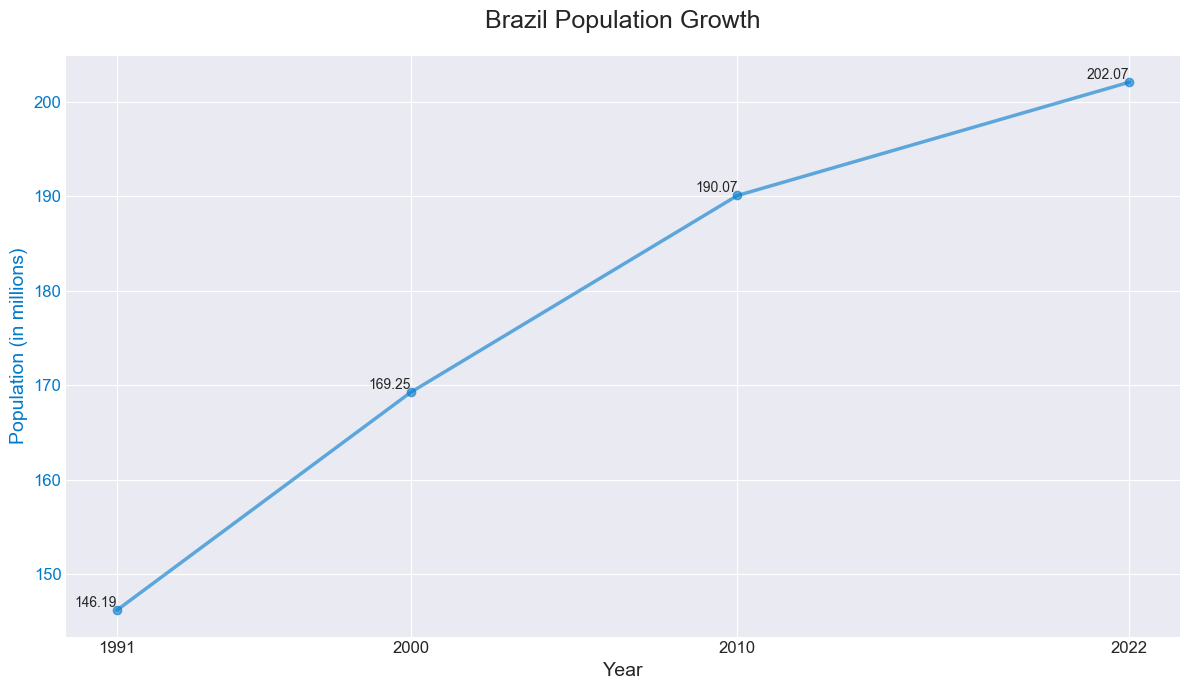

In [80]:
# População para Milhões de habitantes
brazil_population_df['population_millions'] = brazil_population_df['population'] / 1e6

# Estilo do gráfico
plt.style.use('seaborn-darkgrid')

# Criação do gráfico
fig, ax1 = plt.subplots(figsize=(12,7))

# Gráfico principal para a população
line1, = ax1.plot('year', 'population_millions', data=brazil_population_df, marker='o', color='#007acc', label='Population', alpha=0.6, linewidth=2.5)
ax1.set_title('Brazil Population Growth', fontsize=18, pad=20)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Population (in millions)', color='#007acc', fontsize=14)
ax1.tick_params('y', colors='#007acc', labelsize=12)
ax1.tick_params('x', labelsize=12)
ax1.set_xticks(brazil_population_df['year'].values)  # Define os anos dos censos no eixo X

# Rótulos nos pontos da linha
for i, txt in enumerate(brazil_population_df['population_millions']):
    ax1.text(brazil_population_df['year'].iloc[i], brazil_population_df['population_millions'].iloc[i], f'{txt:.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# Exibir o gráfico
plt.tight_layout()
plt.show()


### Pivot Table | Population by City

In [81]:
# Criação do pivot table
city_population_pivot = df.pivot_table(index=['state', 'city'], columns='year', values='population').reset_index()
city_population_pivot.columns.name = None  # Remove o nome do índice das colunas

# Função para converter valores para inteiros, exceto NaN
def convert_to_int(val):
    return int(val) if not pd.isna(val) else val

# Aplicando a conversão apenas nas colunas de população
cols_to_convert = [1991, 2000, 2010, 2022]
city_population_pivot[cols_to_convert] = city_population_pivot[cols_to_convert].applymap(convert_to_int)

# Mostrar o DataFrame ajustado
pd.options.display.float_format = '{:,.0f}'.format
print(city_population_pivot)


     state          city   1991   2000   2010   2022
0       AC    Acrelândia    NaN  7,929 12,538  13978
1       AC  Assis Brasil  2,914  3,490  6,023   8090
2       AC     Brasiléia 20,125 16,991 21,383  25931
3       AC        Bujari    NaN  5,826  8,459  12917
4       AC      Capixaba    NaN  5,206  8,796  10370
...    ...           ...    ...    ...    ...    ...
5565    TO    Tocantínia  6,342  5,621  6,730   7439
5566    TO      Tupirama    NaN  1,179  1,574   1909
5567    TO    Tupiratins    NaN  1,364  2,097   1865
5568    TO  Wanderlândia  9,243 10,259 10,966  10506
5569    TO       Xambioá 11,686 12,124 11,476  10503

[5570 rows x 6 columns]


### Pivot Table | Population by State

In [82]:
state_population_pivot = df.pivot_table(index=['state'], columns='year', values='population', aggfunc='sum').reset_index()
state_population_pivot.columns.name = None
print(state_population_pivot)

   state       1991       2000       2010       2022
0     AC    416,449    556,475    730,903    824,456
1     AL  2,507,990  2,818,628  3,114,195  3,117,174
2     AM  2,097,178  2,806,332  3,476,658  3,928,931
3     AP    288,463    475,522    667,234    729,102
4     BA 11,841,182 13,044,502 13,992,202 14,097,991
5     CE  6,357,237  7,420,084  8,439,947  8,768,228
6     DF  1,593,455  2,044,211  2,558,865  2,792,551
7     ES  2,593,882  3,090,737  3,501,693  3,807,835
8     GO  4,002,031  4,988,946  5,985,111  7,021,254
9     MA  4,923,102  5,646,116  6,568,693  6,759,185
10    MG 15,676,612 17,834,022 19,519,023 20,435,265
11    MS  1,770,546  2,068,831  2,437,037  2,736,741
12    MT  2,012,351  2,484,096  3,020,113  3,636,603
13    PA  4,929,405  6,182,021  7,566,369  8,084,091
14    PB  3,195,435  3,438,084  3,758,323  3,959,395
15    PE  7,112,485  7,900,044  8,770,723  9,017,554
16    PI  2,578,177  2,840,041  3,114,735  3,261,288
17    PR  8,413,671  9,532,043 10,406,307 11,3

## Graph | Population Growth by State (log scale)

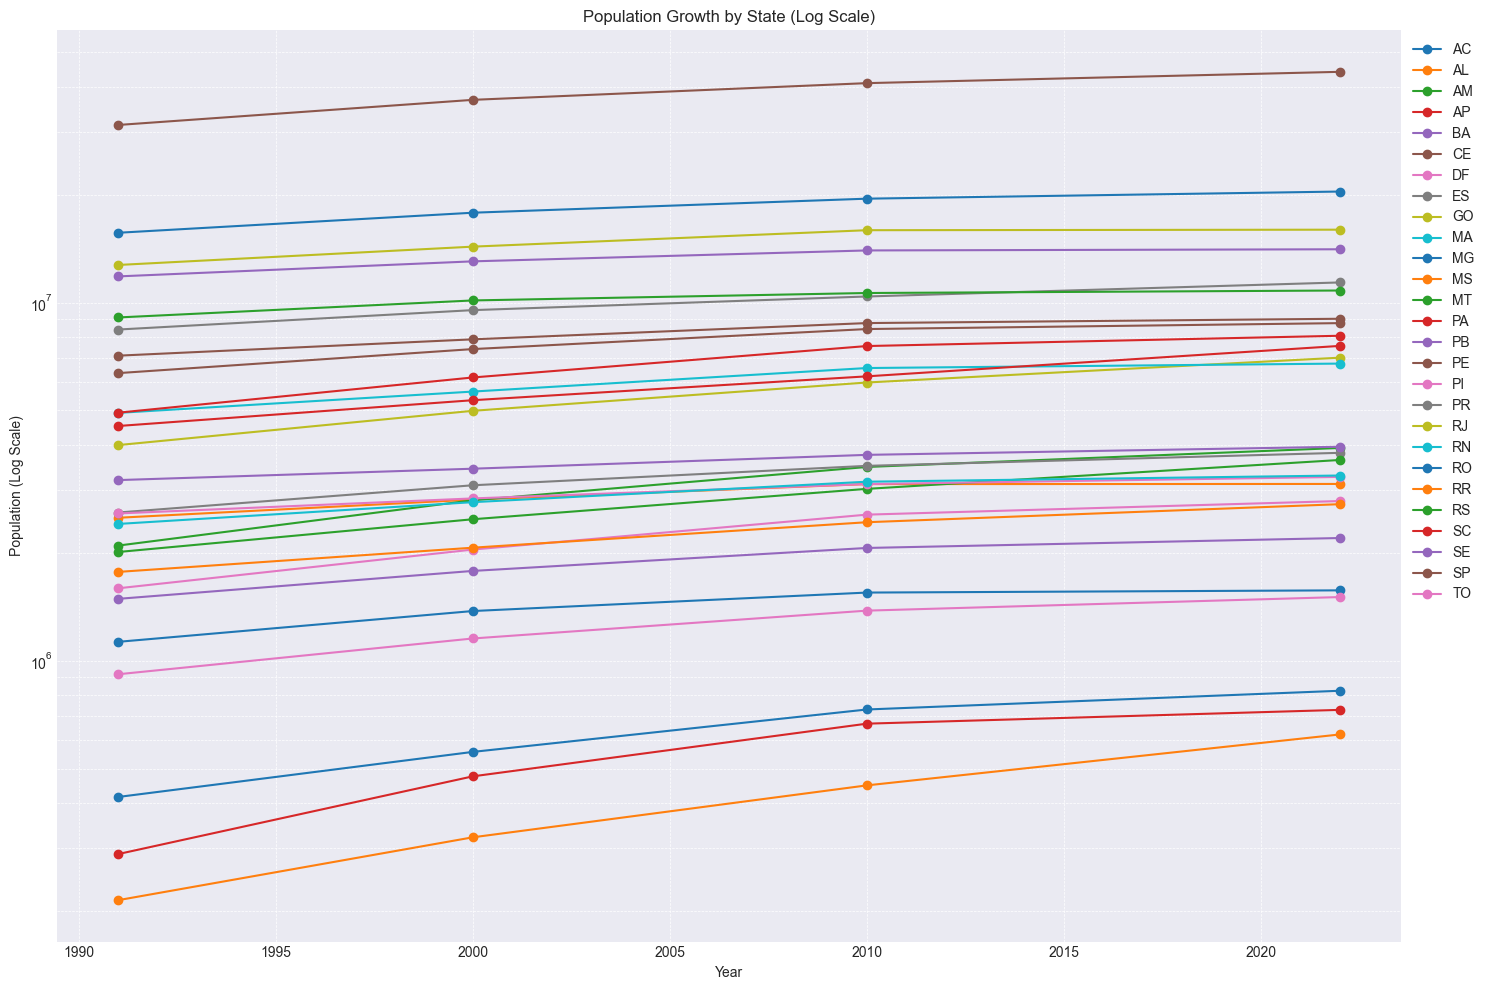

In [83]:
import matplotlib.pyplot as plt

# Definindo a lista de anos
years = [1991, 2000, 2010, 2022]

plt.figure(figsize=(15, 10))

# Iterando por cada estado e plotando no gráfico
for index, state in state_population_pivot.iterrows():
    plt.plot(years, state[years], label=state['state'], marker='o')

plt.yscale('log')  # Definindo a escala do eixo Y para logarítmica
plt.title('Population Growth by State (Log Scale)')
plt.xlabel('Year')
plt.ylabel('Population (Log Scale)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [84]:
# Definindo a coluna 'state' como índice
state_population_pivot.set_index('state', inplace=True)

# Calculando TCA para cada intervalo e armazenando no dicionário tcas
intervals = [(1991, 2000), (2000, 2010), (2010, 2022)]
tcas = {}

for start, end in intervals:
    n = end - start
    tca = ((state_population_pivot[end] / state_population_pivot[start]) ** (1/n)) - 1
    tcas[f"TCA {start}-{end}"] = tca

# Criando DataFrame a partir do dicionário tcas
tca_df = pd.DataFrame(tcas)

# Ajustando a formatação para exibir os valores reais de TCA
pd.options.display.float_format = '{:,.5f}'.format

print(tca_df)

       TCA 1991-2000  TCA 2000-2010  TCA 2010-2022
state                                             
AC           0.03273        0.02764        0.01009
AL           0.01306        0.01002        0.00008
AM           0.03289        0.02165        0.01024
AP           0.05711        0.03445        0.00742
BA           0.01081        0.00704        0.00063
CE           0.01733        0.01296        0.00318
DF           0.02807        0.02271        0.00731
ES           0.01966        0.01256        0.00701
GO           0.02479        0.01837        0.01339
MA           0.01534        0.01525        0.00239
MG           0.01443        0.00907        0.00383
MS           0.01745        0.01651        0.00971
MT           0.02368        0.01973        0.01560
PA           0.02548        0.02041        0.00553
PB           0.00817        0.00895        0.00435
PE           0.01174        0.01051        0.00232
PI           0.01081        0.00928        0.00384
PR           0.01396        0.0

### Mapa de Calor com as taxas de crescimento por estado nos ultimos anos

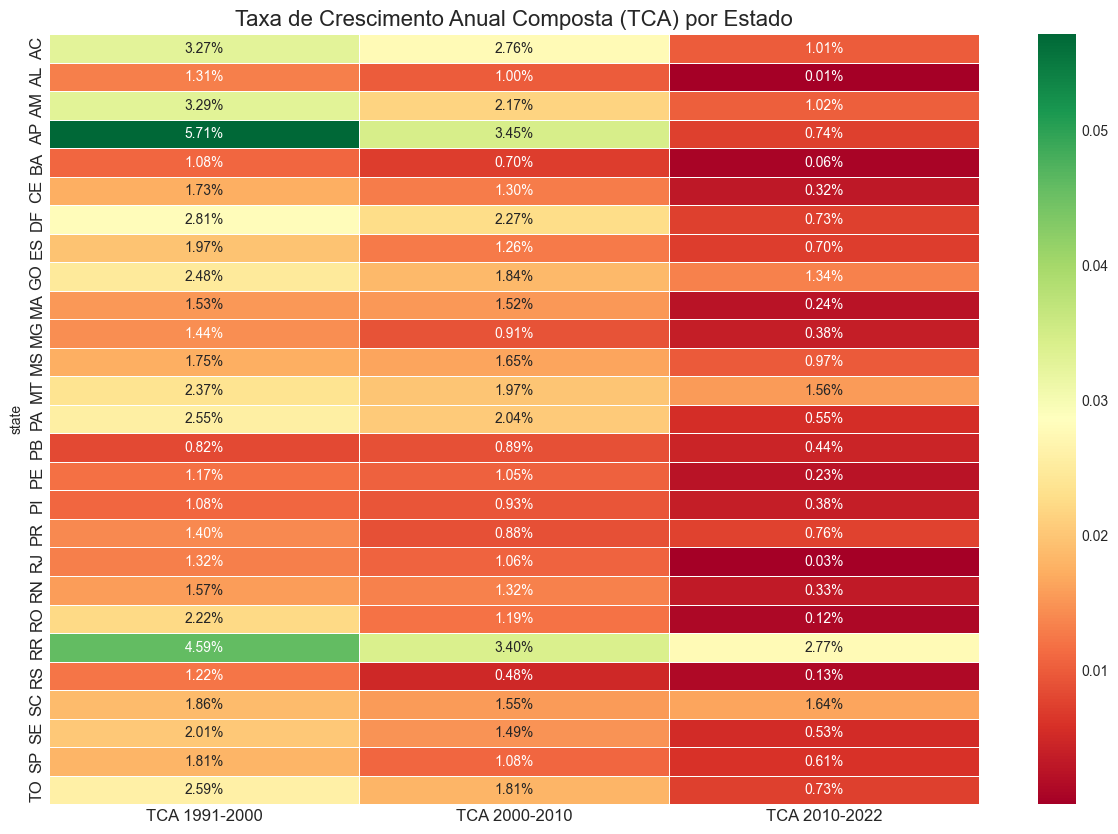

In [85]:
plt.figure(figsize=(15, 10))  # Aumentar o tamanho da figura

ax = sns.heatmap(tca_df, annot=True, cmap='RdYlGn', fmt=".2%", linewidths=.5)

plt.title("Taxa de Crescimento Anual Composta (TCA) por Estado", fontsize=16)

# Ajustar o tamanho da fonte dos rótulos
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.show()

### Reference
